Random Forest Regression:
RMSE (Root Mean Squared Error): This metric measures the average deviation of the predicted values from the actual values. Lower values indicate better performance.
MSE (Mean Squared Error): This metric measures the average of the squares of the errors between predicted and actual values. Lower values indicate better performance.
MAE (Mean Absolute Error): This metric measures the average of the absolute differences between predicted and actual values. Lower values indicate better performance.
R2 Score: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better fit.

Random Forest Regression Results:
RMSE: 5.110578778304108
MSE: 26.118015449252304
MAE: 3.472546327419586
R2 Score: 0.8938369540165259


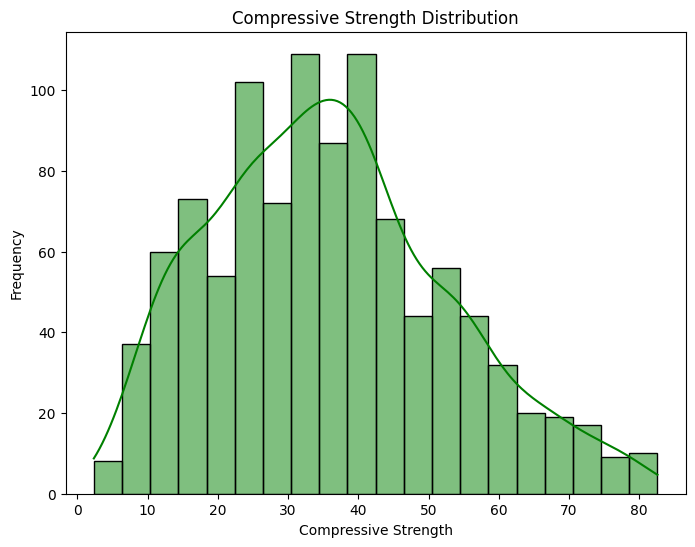

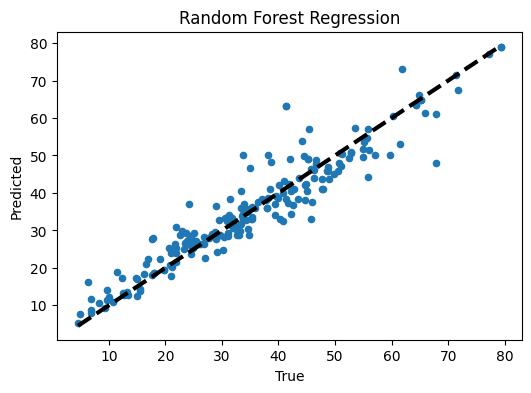

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = r"C:\Users\maddi\OneDrive\Desktop\year - 1\imi\Concrete_Data.xls"
data = pd.read_excel(file_path)

# Data preprocessing
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
mapper = {col: req_col_names[i] for i, col in enumerate(data.columns)}
data = data.rename(columns=mapper)

# Train-test split
X = data.iloc[:, :-1]   
y = data.iloc[:, -1]          
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=2)
rf_reg.fit(x_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(x_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Explanation for each output
print("Random Forest Regression:")
print("RMSE (Root Mean Squared Error): This metric measures the average deviation of the predicted values from the actual values. Lower values indicate better performance.")
print("MSE (Mean Squared Error): This metric measures the average of the squares of the errors between predicted and actual values. Lower values indicate better performance.")
print("MAE (Mean Absolute Error): This metric measures the average of the absolute differences between predicted and actual values. Lower values indicate better performance.")
print("R2 Score: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better fit.")

print("\nRandom Forest Regression Results:")
print("RMSE:", rmse_rf)
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)

# Plotting Compressive Strength Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['CC_Strength'], kde=True, color='green', bins=20)
plt.title('Compressive Strength Distribution')
plt.xlabel('Compressive Strength')
plt.ylabel('Frequency')
plt.show()
# Your existing Random Forest Regression code...

# Create scatter plot for Random Forest Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()

